In [681]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [682]:
def get_xls_sheet_names(file):
    xls = pd.ExcelFile(file)
    return xls.sheet_names

In [683]:
def get_dataframe(file, sheets, many_sheets=False):
    if not many_sheets:
        data = pd.read_excel(file, sheet_name=sheets)
        data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    else:
        for sheet in sheets:
            # load all the sheets into one dataframe
            if sheet == sheets[0]:
                data = pd.read_excel(file, sheet_name=sheet)
                data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
            else:
                data_merge = pd.read_excel(file, sheet_name=sheet)
                data_merge.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    return data

def find_column_of_interest(data, search_term):
    potential_columns = []
    for column in data.columns:
        if search_term in column:
            # type of series is on row index 1 
            potential_columns.append((column, data.iloc[1][column]))

    return potential_columns

In [684]:
data1_file = "5206001_Key_Aggregates.xlsx"
get_xls_sheet_names(data1_file)

['Index', 'Data1', 'Enquiries']

In [685]:
data1_df = get_dataframe(data1_file, "Data1")
data1_df.head(12)

,Date,Gross domestic product: Chain volume measures - Percentage changes ;,GDP per capita: Chain volume measures - Percentage changes ;,Gross value added market sector: Chain volume measures - Percentage changes ;,Net domestic product: Chain volume measures - Percentage changes ;,Real gross domestic income: Chain volume measures - Percentage changes ;,Real gross national income: Chain volume measures - Percentage changes ;,Real net national disposable income: Chain volume measures - Percentage changes ;,Real net national disposable income per capita: Chain volume measures - Percentage changes ;,Gross domestic product: Current prices - Percentage Changes ;,...,Gross national income: Current prices ;.2,Net saving: Current prices ;.2,Household saving ratio: Ratio ;.2,Hours worked: Index ;.2,Hours worked market sector: Index ;.2,GDP per hour worked: Index ;.2,Gross value added per hour worked market sector: Index ;.2,Gross domestic product: Index ;.1,Domestic final demand: Index ;.1,Terms of trade: Index ;.2
0,Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,$ Millions,$ Millions,proportion,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers
1,Series Type,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,...,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED
3,Frequency,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,...,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter
4,Collection Month,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,Series Start,1959-12-01 00:00:00,1973-12-01 00:00:00,1994-12-01 00:00:00,1959-12-01 00:00:00,1959-12-01 00:00:00,1959-12-01 00:00:00,1959-12-01 00:00:00,1973-12-01 00:00:00,1959-12-01 00:00:00,...,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1978-09-01 00:00:00,1985-09-01 00:00:00,1978-09-01 00:00:00,1994-09-01 00:00:00,1985-09-01 00:00:00,1985-09-01 00:00:00,1959-09-01 00:00:00
6,Series End,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,...,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00
7,No. Obs,258,202,118,258,258,258,258,202,258,...,259,259,259,183,155,183,119,155,155,259
8,Series ID,A2298668K,A2304308C,A3606044K,A2304312V,A2304314X,A2304316C,A2304318J,A2304320V,A2304322X,...,A2302469F,A2302470R,A2323381C,A2302472V,A2302473W,A2302474X,A3606063T,A2302476C,A2302477F,A2302478J
9,1959-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4112,736,20.8,NaN,NaN,NaN,NaN,NaN,NaN,53.6


In [686]:
find_column_of_interest(data1_df, "Gross domestic product")

[('Gross domestic product: Chain volume measures - Percentage changes ;',
  'Trend'),
 ('Gross domestic product: Current prices - Percentage Changes ;', 'Trend'),
 ('Gross domestic product: Chain volume measures ;', 'Trend'),
 ('Gross domestic product: Current prices ;', 'Trend'),
 ('Gross domestic product: Chain volume measures - Percentage changes ;.1',
  'Seasonally Adjusted'),
 ('Gross domestic product: Current prices - Percentage Changes ;.1',
  'Seasonally Adjusted'),
 ('Gross domestic product: Index - Percentage changes ;',
  'Seasonally Adjusted'),
 ('Gross domestic product: Chain volume measures ;.1', 'Seasonally Adjusted'),
 ('Gross domestic product: Current prices ;.1', 'Seasonally Adjusted'),
 ('Gross domestic product: Index ;', 'Seasonally Adjusted'),
 ('Gross domestic product: Chain volume measures - Percentage changes ;.2',
  'Original'),
 ('Gross domestic product: Current prices - Percentage Changes ;.2',
  'Original'),
 ('Gross domestic product: Index - Percentage chan

In [687]:
data1_df = data1_df[["Date", "Gross domestic product: Current prices ;.1", "Gross domestic product: Current prices ;.2", "Gross domestic product: Chain volume measures ;.1", "Gross domestic product: Chain volume measures ;.2", "GDP per capita: Chain volume measures ;.1", "GDP per capita: Chain volume measures ;.2"]]
data1_df.columns = ["Date", "Nominal GDP (seasonal)", "Nominal GDP (original)", "Real GDP (seasonal)", "Real GDP (original)", "GDP per capita (seasonal)", "GDP per capita (original)"]
data1_df = data1_df.dropna()
data1_df = data1_df.iloc[9:]
data1_df = data1_df.reset_index(drop=True)
data1_df["Date"] = pd.to_datetime(data1_df["Date"])
data1_df = data1_df[(data1_df["Date"].dt.year >= 1985) & (data1_df["Date"].dt.year <= 2024)]
data1_df = data1_df.reset_index(drop=True)

data1_df.head(12)

,Date,Nominal GDP (seasonal),Nominal GDP (original),Real GDP (seasonal),Real GDP (original),GDP per capita (seasonal),GDP per capita (original)
0,1985-03-01,59613,56159,191410,180740,12165,11485
1,1985-06-01,61960,60924,195620,193187,12390,12236
2,1985-09-01,63412,62861,198226,195240,12513,12326
3,1985-12-01,64649,69797,197645,213953,12429,13456
4,1986-03-01,65861,62355,198953,188760,12467,11826
5,1986-06-01,67040,65854,198604,195475,12398,12203
6,1986-09-01,68286,67904,199149,196391,12387,12217
7,1986-12-01,70564,75617,202486,216334,12546,13405
8,1987-03-01,72338,68780,204435,195783,12619,12082
9,1987-06-01,75076,74052,207690,205252,12770,12620


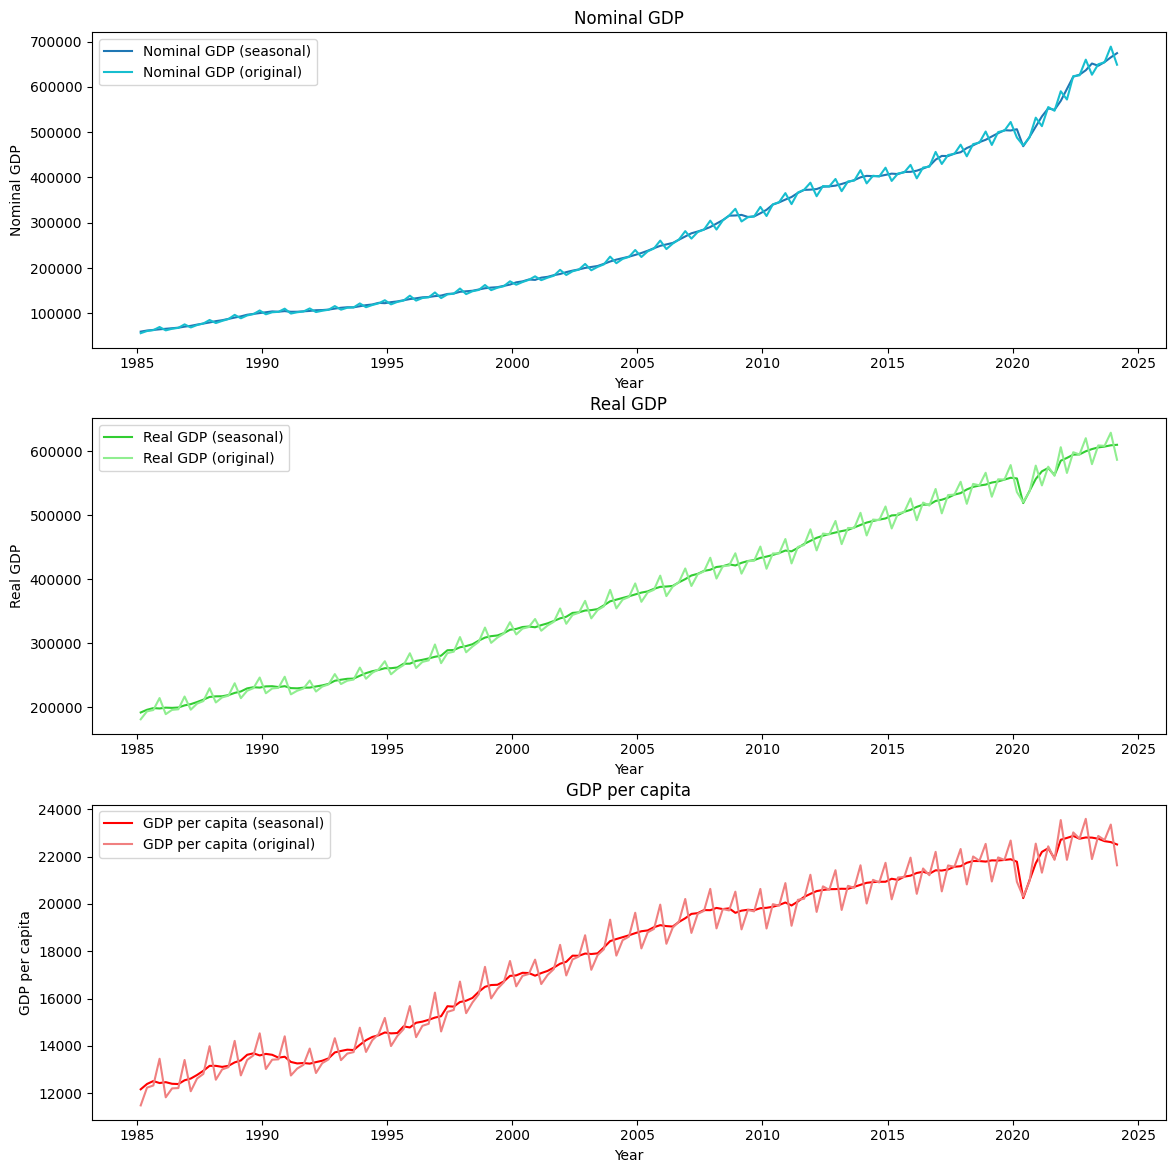

In [688]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
fig.tight_layout(pad=3.0)

ax[0].plot(data1_df["Date"], data1_df["Nominal GDP (seasonal)"], label="Nominal GDP (seasonal)", color="tab:blue")
ax[0].plot(data1_df["Date"], data1_df["Nominal GDP (original)"], label="Nominal GDP (original)", color="tab:cyan")
ax[0].set_title("Nominal GDP")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Nominal GDP")
ax[0].legend()

ax[1].plot(data1_df["Date"], data1_df["Real GDP (seasonal)"], label="Real GDP (seasonal)", color="limegreen")
ax[1].plot(data1_df["Date"], data1_df["Real GDP (original)"], label="Real GDP (original)", color="lightgreen")
ax[1].set_title("Real GDP")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Real GDP")
ax[1].legend()

ax[2].plot(data1_df["Date"], data1_df["GDP per capita (seasonal)"], label="GDP per capita (seasonal)", color="red")
ax[2].plot(data1_df["Date"], data1_df["GDP per capita (original)"], label="GDP per capita (original)", color="lightcoral")
ax[2].set_title("GDP per capita")
ax[2].set_xlabel("Year")
ax[2].set_ylabel("GDP per capita")
ax[2].legend()

plt.show()


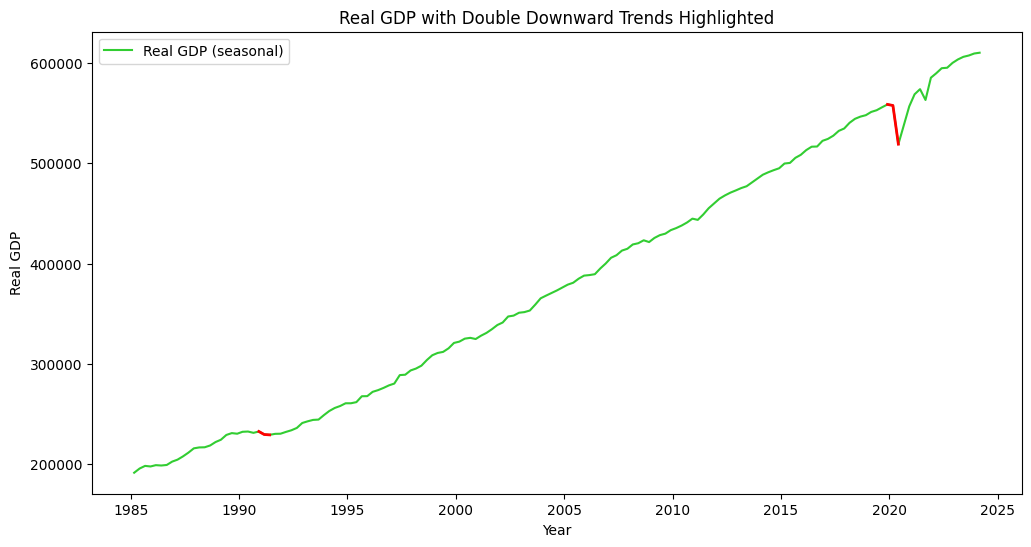

In [689]:
def highlight_double_downward_trends(dates, values, ax, color='red'):
    trend_start = 0
    downward_count = 0
    for i in range(1, len(values)):
        if values[i] < values[i-1]:
            downward_count += 1
            if downward_count == 1:
                trend_start = i - 1
        else:
            if downward_count >= 2:
                ax.plot(dates[trend_start:i], values[trend_start:i], color=color, linewidth=2)
            downward_count = 0
            trend_start = i
    
    # Check if the last trend was a double downward trend
    if downward_count >= 2:
        ax.plot(dates[trend_start:], values[trend_start:], color=color, linewidth=2)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data1_df["Date"], data1_df["Real GDP (seasonal)"], label="Real GDP (seasonal)", color="limegreen")
# ax.plot(data1_df["Date"], data1_df["Real GDP (original)"], label="Real GDP (original)", color="lightgreen")

highlight_double_downward_trends(data1_df["Date"], data1_df["Real GDP (seasonal)"], ax, color='red')
# highlight_double_downward_trends(data1_df["Date"], data1_df["Real GDP (original)"], ax, color='darkred')

ax.set_title("Real GDP with Double Downward Trends Highlighted")
ax.set_xlabel("Year")
ax.set_ylabel("Real GDP")
ax.legend()

plt.show()

In [690]:
data2_file = "5206011_National_Income_Account.xlsx"
xls = pd.ExcelFile(data2_file)
sheet_names = xls.sheet_names
sheet_names

['Index', 'Data1', 'Enquiries']

In [728]:
data2_file = "5206011_National_Income_Account.xlsx"
get_xls_sheet_names(data2_file)

['Index', 'Data1', 'Enquiries']

In [729]:
data2_df = get_dataframe(data2_file, "Data1")
data2_df.head(12)

,Date,Compensation of employees ;,Gross operating surplus ;,Gross mixed income ;,Taxes less subsidies on production and imports ;,Net primary income from non-residents ;,Gross national income ;,"Net secondary income from non-residents - Current taxes on income, wealth, etc ;",Net secondary income from non-residents - Other secondary income ;,GROSS DISPOSABLE INCOME ;,...,General government ; Final consumption expenditure ;.2,Households ; Final consumption expenditure ;.2,All sectors ; Final consumption expenditure ;.2,Non-financial corporations ; Net saving ;.2,Financial corporations ; Net saving ;.2,General government ; Net saving ;.2,Households ; Net saving ;.2,All sectors ; Net saving ;.2,Consumption of fixed capital ;.2,TOTAL USE OF GROSS DISPOSABLE INCOME ;.2
0,Unit,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,...,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions
1,Series Type,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,...,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED
3,Frequency,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,...,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter
4,Collection Month,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,Series Start,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,...,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1988-09-01 00:00:00,1988-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00,1959-09-01 00:00:00
6,Series End,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,...,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00
7,No. Obs,259,259,259,259,259,259,259,259,259,...,259,259,259,143,143,259,259,259,259,259
8,Series ID,A2303556W,A2303572W,A2303574A,A2303078R,A2303079T,A2304354T,A2303080A,A2303081C,A2303082F,...,A2302527T,A2302528V,A2302529W,A85125815F,A85125816J,A2302280A,A2302281C,A2302470R,A2302293L,A2305133F
9,1959-09-01 00:00:00,1848,887,992,350,-71,4003,1,34,4038,...,434,2267,2701,NaN,NaN,-54,594,736,707,4144


In [730]:
find_column_of_interest(data2_df, "Compensation of employees")

[('Compensation of employees ;', 'Trend'),
 ('Compensation of employees ;.1', 'Seasonally Adjusted'),
 ('Compensation of employees ;.2', 'Original')]

In [731]:
find_column_of_interest(data2_df, "Gross operating surplus")

[('Gross operating surplus ;', 'Trend'),
 ('Gross operating surplus ;.1', 'Seasonally Adjusted'),
 ('Gross operating surplus ;.2', 'Original')]

In [732]:
find_column_of_interest(data2_df, "Gross national income")

[('Gross national income ;', 'Trend'),
 ('Gross national income ;.1', 'Seasonally Adjusted'),
 ('Gross national income ;.2', 'Original')]

In [733]:
# Need to keep "Date" "Compensation of employees" "Gross Operating Surplus" and "Gross National Income"."

data2_df = data2_df[["Date", "Compensation of employees ;.2", "Gross operating surplus ;.2", "Gross national income ;.2"]]
data2_df.columns = ["Date", "Compensation of employees", "Gross Operating Surplus", "Gross National Income"]
data2_df = data2_df.dropna()
data2_df = data2_df.iloc[9:]
data2_df = data2_df.reset_index(drop=True)
data2_df["Date"] = pd.to_datetime(data2_df["Date"])

data2_df.head()

,Date,Compensation of employees,Gross Operating Surplus,Gross National Income
0,1959-09-01,1902,915,4112
1,1959-12-01,2010,1006,4549
2,1960-03-01,1855,857,3917
3,1960-06-01,2026,893,4063
4,1960-09-01,2097,1072,4442


In [734]:
data2_df["Labour Share of Income"] = data2_df["Compensation of employees"] / data2_df["Gross National Income"]
data2_df["Capital Share of Income"] = data2_df["Gross Operating Surplus"] / data2_df["Gross National Income"]

data2_df.head()

,Date,Compensation of employees,Gross Operating Surplus,Gross National Income,Labour Share of Income,Capital Share of Income
0,1959-09-01,1902,915,4112,0.462549,0.222519
1,1959-12-01,2010,1006,4549,0.441855,0.221148
2,1960-03-01,1855,857,3917,0.473577,0.21879
3,1960-06-01,2026,893,4063,0.498646,0.219788
4,1960-09-01,2097,1072,4442,0.472085,0.241333


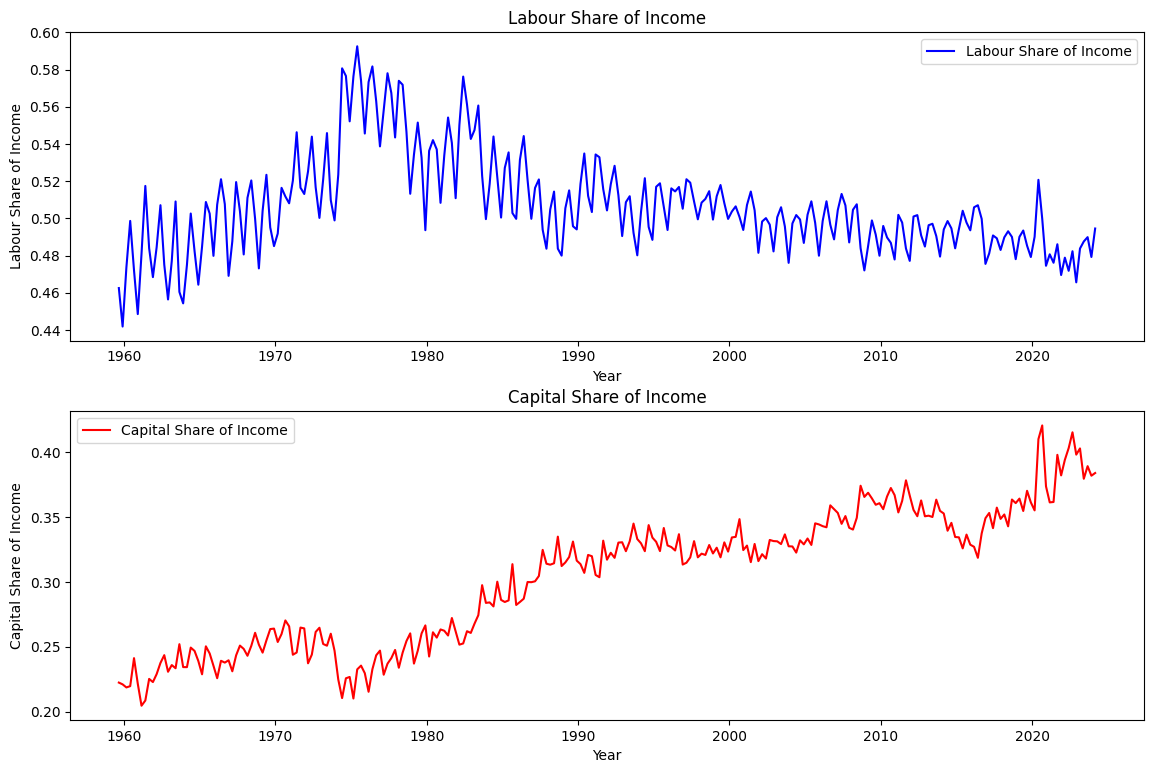

In [735]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
fig.tight_layout(pad=3.0)

ax[0].plot(data2_df["Date"], data2_df["Labour Share of Income"], label="Labour Share of Income", color="blue")
ax[0].set_title("Labour Share of Income")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Labour Share of Income")
ax[0].legend()

ax[1].plot(data2_df["Date"], data2_df["Capital Share of Income"], label="Capital Share of Income", color="red")
ax[1].set_title("Capital Share of Income")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Capital Share of Income")
ax[1].legend()

plt.show()

In [736]:
data1_df = pd.read_excel(data1_file, sheet_name="Data1")
data1_df.rename(columns={data1_df.columns[0]: "Date"}, inplace=True)
data1_df = data1_df[["Date", "Household saving ratio: Ratio ;.2"]]
data1_df.columns = ["Date", "Household Saving Ratio"]
data1_df = data1_df.dropna()
data1_df = data1_df.iloc[9:]
data1_df = data1_df.reset_index(drop=True)
data1_df["Date"] = pd.to_datetime(data1_df["Date"])
data1_df = data1_df[(data1_df["Date"].dt.year >= 2007) & (data1_df["Date"].dt.year <= 2024)]
data1_df = data1_df.reset_index(drop=True)
data1_df.head(100)

,Date,Household Saving Ratio
0,2007-03-01,1
1,2007-06-01,-4.3
2,2007-09-01,5.2
3,2007-12-01,0
4,2008-03-01,2.1
...,...,...
64,2023-03-01,2.5
65,2023-06-01,-3
66,2023-09-01,7.6
67,2023-12-01,-0.5


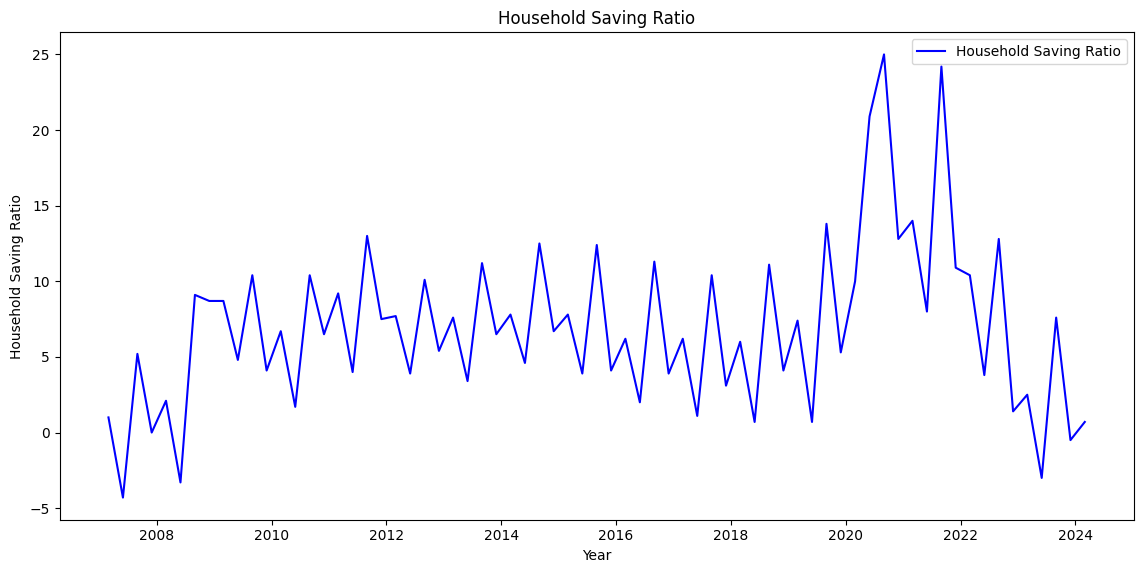

In [737]:
# plot the Household Saving Ratio over time

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.tight_layout(pad=3.0)

ax.plot(data1_df["Date"], data1_df["Household Saving Ratio"], label="Household Saving Ratio", color="blue")
ax.set_title("Household Saving Ratio")
ax.set_xlabel("Year")
ax.set_ylabel("Household Saving Ratio")
ax.legend()

plt.show()

In [738]:
data3_file = "6202001.xlsx"
xls = pd.ExcelFile(data3_file)
sheet_names = xls.sheet_names
sheet_names

['Index', 'Data1', 'Enquiries']

In [739]:
data3_df = pd.read_excel(data3_file, sheet_name="Data1")
data3_df.rename(columns={data3_df.columns[0]: "Date"}, inplace=True)
data3_df.head(12)

,Date,Employed total ; Persons ;,Employed total ; Persons ;.1,Employed total ; Persons ;.2,Employed total ; > Males ;,Employed total ; > Males ;.1,Employed total ; > Males ;.2,Employed total ; > Females ;,Employed total ; > Females ;.1,Employed total ; > Females ;.2,...,Participation rate ; > Males ;.2,Participation rate ; > Females ;,Participation rate ; > Females ;.1,Participation rate ; > Females ;.2,Not in the labour force (NILF) ; Persons ;,Not in the labour force (NILF) ; > Males ;,Not in the labour force (NILF) ; > Females ;,Civilian population aged 15 years and over ; Persons ;,Civilian population aged 15 years and over ; > Males ;,Civilian population aged 15 years and over ; > Females ;
0,Unit,000,000,000,000,000,000,000,000,000,...,Percent,Percent,Percent,Percent,000,000,000,000,000,000
1,Series Type,Trend,Seasonally Adjusted,Original,Trend,Seasonally Adjusted,Original,Trend,Seasonally Adjusted,Original,...,Original,Trend,Seasonally Adjusted,Original,Original,Original,Original,Original,Original,Original
2,Data Type,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,...,PERCENT,PERCENT,PERCENT,PERCENT,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,...,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,...,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,...,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557,557,557,557,557,557,557,557,...,557,557,557,557,557,557,557,557,557,557
8,Series ID,A84423127L,A84423043C,A84423085A,A84423113X,A84423029J,A84423071L,A84423141J,A84423057T,A84423099R,...,A84423079F,A84423149A,A84423065T,A84423107C,A84423090V,A84423076X,A84423104W,A84423091W,A84423077A,A84423105X
9,1978-02-01 00:00:00,6007.989516,5997.548946,5985.659716,3889.300836,3881.114768,3887.387982,2118.688681,2116.434179,2098.271734,...,80.095269,43.31287,43.492223,43.731849,4020.853437,1029.791562,2991.061874,10489.329965,5173.601964,5315.728001


In [740]:
df3 = data3_df[["Date", "Unemployment rate ;  Persons ;.2", "Participation rate ;  Persons ;.2"]]
df3.head(12)

,Date,Unemployment rate ; Persons ;.2,Participation rate ; Persons ;.2
0,Unit,Percent,Percent
1,Series Type,Original,Original
2,Data Type,PERCENT,PERCENT
3,Frequency,Month,Month
4,Collection Month,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557
8,Series ID,A84423092X,A84423093A
9,1978-02-01 00:00:00,7.46415,61.667204


In [741]:

df3.columns = ["Date", "Unemployment Rate", "Participation Rate"]
df3 = df3.dropna()
df3 = df3.iloc[9:]
df3 = df3.reset_index(drop=True)
df3["Date"] = pd.to_datetime(df3["Date"])

df3 = df3[(df3["Date"].dt.year > 1979)]

df3.head(12)

,Date,Unemployment Rate,Participation Rate
23,1980-01-01,6.738266,60.527737
24,1980-02-01,6.739071,61.376612
25,1980-03-01,6.208904,61.635928
26,1980-04-01,6.150899,60.988064
27,1980-05-01,6.226861,61.421332
28,1980-06-01,6.128534,61.222971
29,1980-07-01,5.784313,61.348007
30,1980-08-01,5.909508,61.018409
31,1980-09-01,6.022376,61.75027
32,1980-10-01,5.650363,61.024102


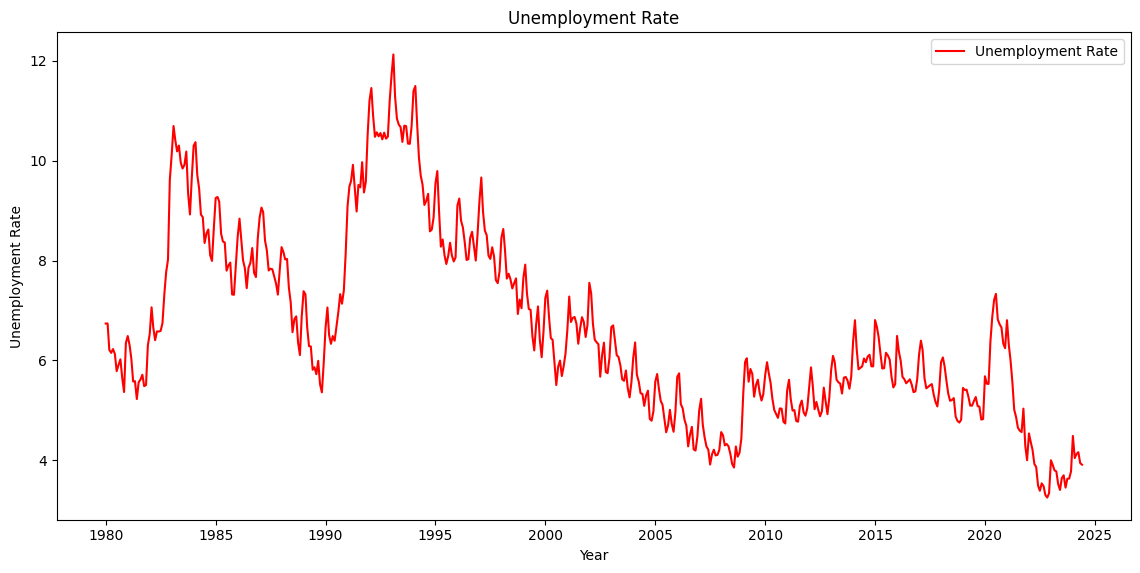

In [742]:
# plot the unemployment rate 

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.tight_layout(pad=3.0)

ax.plot(df3["Date"], df3["Unemployment Rate"], label="Unemployment Rate", color="red")
ax.set_title("Unemployment Rate")
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment Rate")
ax.legend()

plt.show()

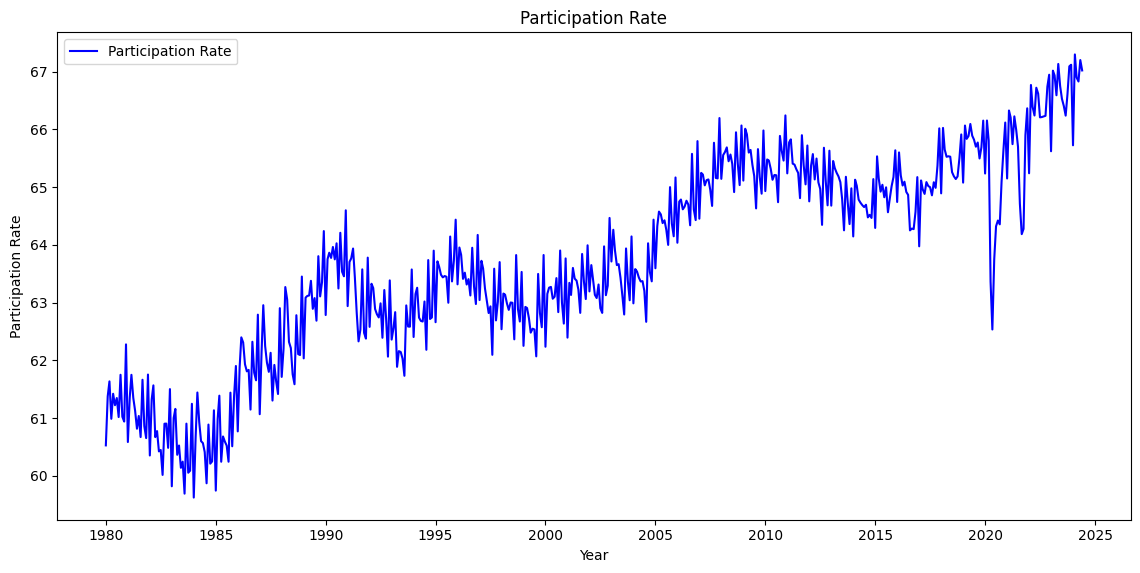

In [743]:
# plot the participation rate

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.tight_layout(pad=3.0)

ax.plot(df3["Date"], df3["Participation Rate"], label="Participation Rate", color="blue")
ax.set_title("Participation Rate")
ax.set_xlabel("Year")
ax.set_ylabel("Participation Rate")
ax.legend()

plt.show()

In [744]:
unemployment_rate_average = df3["Unemployment Rate"].mean()
participation_rate_average = df3["Participation Rate"].mean()

print(f"Average Unemployment Rate: {unemployment_rate_average}")
print(f"Average Participation Rate: {participation_rate_average}")

Average Unemployment Rate: 6.616797786891379
Average Participation Rate: 63.73034255449436


In [745]:
data4_file = "6202022.xlsx"
xls = pd.ExcelFile(data4_file)
sheet_names = xls.sheet_names
sheet_names

['Index', 'Data1', 'Data2', 'Data3', 'Data4', 'Enquiries']

In [746]:
data4_df = pd.read_excel(data4_file, sheet_name="Data1")
data4_df.rename(columns={data4_df.columns[0]: "Date"}, inplace=True)
data4_df.head(12)

,Date,Employed total ; Persons ;,Employed total ; Persons ;.1,Employed total ; Persons ;.2,Employed total ; Persons ; 15-64 years ;,Employed total ; Persons ; 15-64 years ;.1,Employed total ; Persons ; 15-64 years ;.2,Employed total ; Persons ; 15-24 years ;,Employed total ; Persons ; 15-24 years ;.1,Employed total ; Persons ; 15-24 years ;.2,...,Underemployed total ; Males ; 55 years and over ;.2,Underemployed total ; Males ; 55-64 years ;,Underemployed total ; Males ; 65 years and over ;,Underemployed total ; Females ;,Underemployed total ; Females ;.1,Underemployed total ; Females ;.2,Underemployed total ; Females ; 15-64 years ;,Underemployed total ; Females ; 15-64 years ;.1,Underemployed total ; Females ; 15-64 years ;.2,Underemployed total ; Females ; 15-24 years ;
0,Unit,000,000,000,000,000,000,000,000,000,...,000,000,000,000,000,000,000,000,000,000
1,Series Type,Trend,Seasonally Adjusted,Original,Trend,Seasonally Adjusted,Original,Trend,Seasonally Adjusted,Original,...,Original,Original,Original,Trend,Seasonally Adjusted,Original,Trend,Seasonally Adjusted,Original,Trend
2,Data Type,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,...,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,...,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,...,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,...,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557,557,557,557,557,557,557,557,...,557,557,557,557,557,557,557,557,557,557
8,Series ID,A84423127L,A84423043C,A84423085A,A84425213V,A84425129C,A84425171J,A84424261V,A84424177C,A84424219R,...,A85256043T,A85255947R,A85255971R,A85256727F,A85255863F,A85256295L,A85256703L,A85255839F,A85256271V,A85256679X
9,1978-02-01 00:00:00,6007.989516,5997.548946,5985.659716,5906.950852,5899.827471,5892.68,1520.009058,1520.424059,1534.91,...,8.560775,7.002659,1.558116,95.431992,93.142256,94.483378,95.032349,92.677347,93.934166,28.605723


In [747]:
df4 = data4_df[["Date", "Underemployed total ;  Persons ;  15-19 years ;.2", "Underemployed total ;  Persons ;  20-24 years ;", "Underemployed total ;  Persons ;  35-44 years ;.2"]]
df4.head(12)

,Date,Underemployed total ; Persons ; 15-19 years ;.2,Underemployed total ; Persons ; 20-24 years ;,Underemployed total ; Persons ; 35-44 years ;.2
0,Unit,000,000,000
1,Series Type,Original,Original,Original
2,Data Type,STOCK,STOCK,STOCK
3,Frequency,Month,Month,Month
4,Collection Month,1,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557,557
8,Series ID,A85256163K,A85256055A,A85256079V
9,1978-02-01 00:00:00,34.829427,20.394318,34.415025


In [748]:

df4.columns = ["Date", "Underemployed 15-19 years", "Underemployed 20-24 years", "Underemployed 35-44 years"]
df4 = df4.dropna()
df4 = df4.iloc[9:]
df4 = df4.reset_index(drop=True)
df4["Date"] = pd.to_datetime(df4["Date"])

df4 = df4[(df4["Date"].dt.year > 1979)]

df4.head(12)

,Date,Underemployed 15-19 years,Underemployed 20-24 years,Underemployed 35-44 years
23,1980-01-01,49.982132,27.141868,31.673532
24,1980-02-01,40.852238,29.942426,41.738258
25,1980-03-01,40.419239,31.998088,47.517919
26,1980-04-01,36.884179,27.109399,41.252317
27,1980-05-01,37.339235,32.390599,36.330419
28,1980-06-01,40.308304,29.040713,37.239657
29,1980-07-01,37.283389,31.325854,39.601969
30,1980-08-01,39.907179,31.354194,40.171907
31,1980-09-01,39.754404,33.887109,42.304185
32,1980-10-01,39.981301,31.25817,37.649257


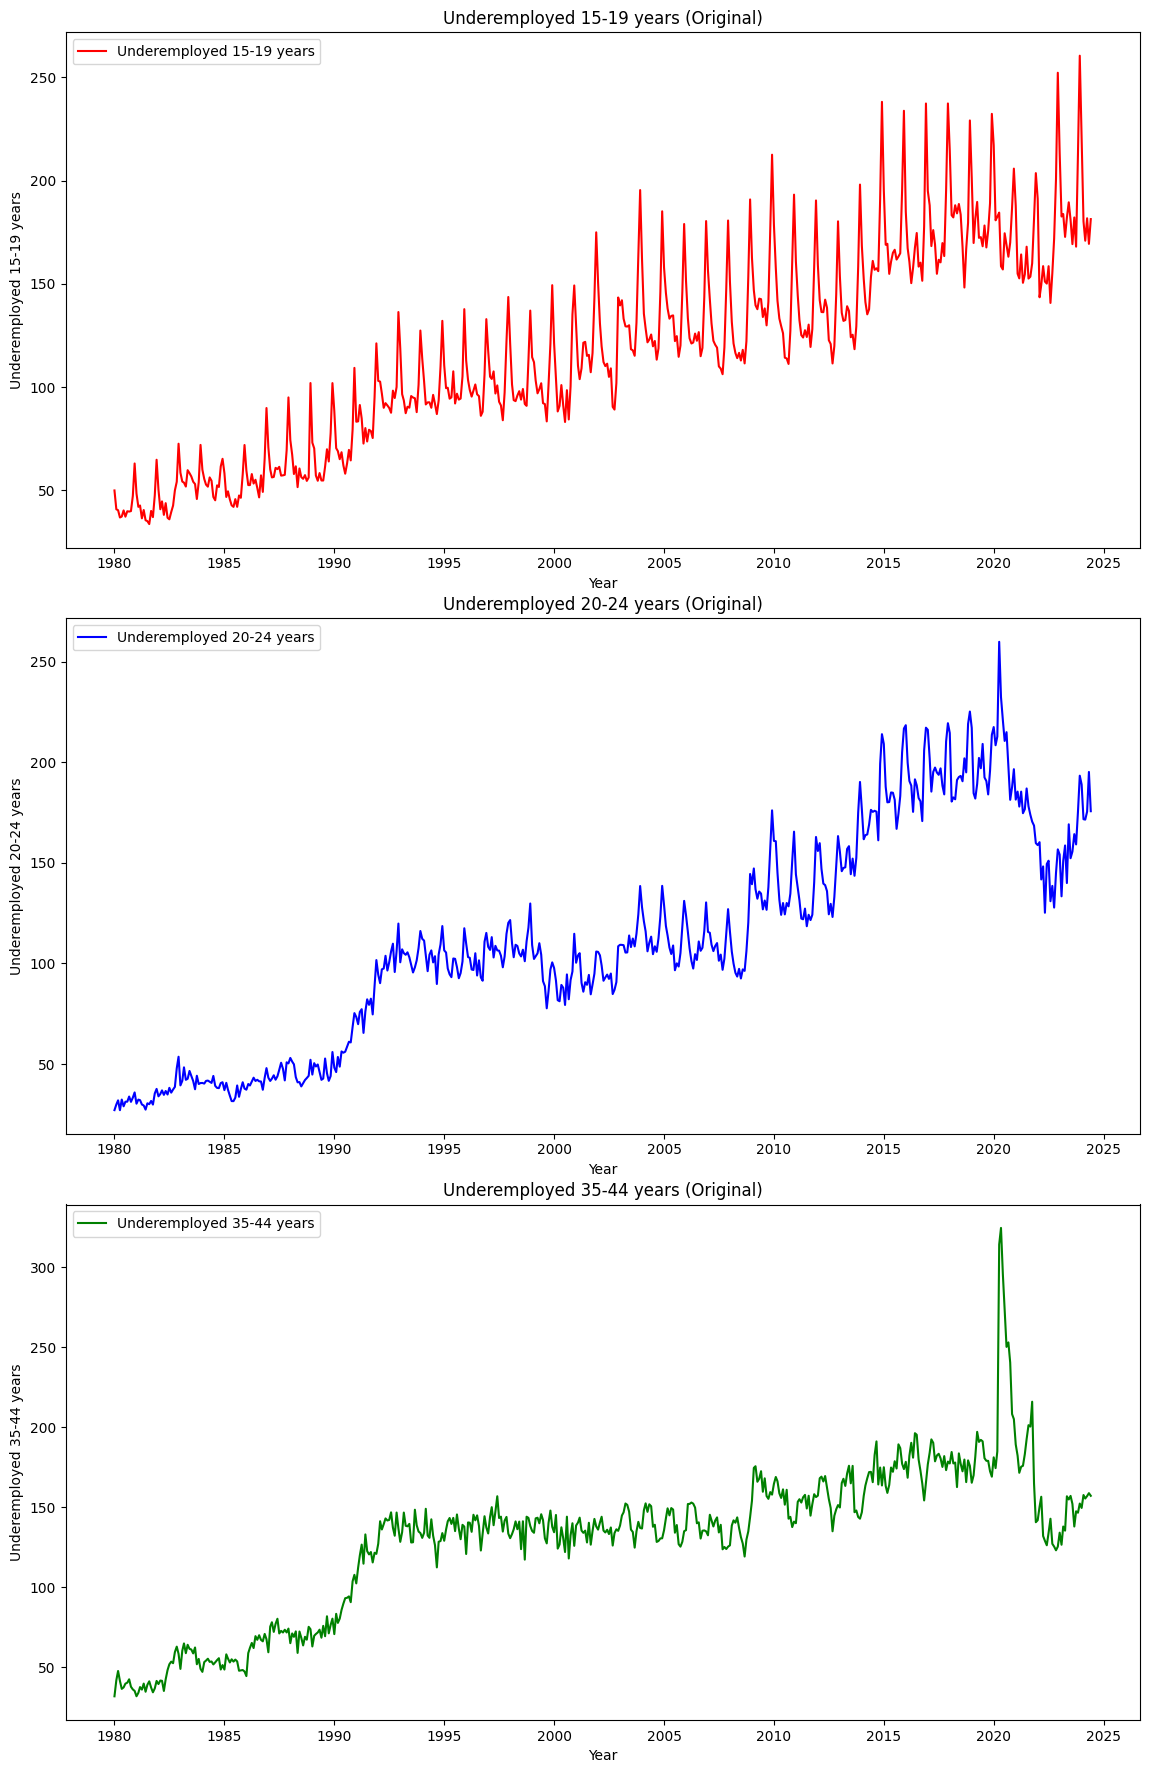

In [749]:
# plot the underemployment rate for each age group

fig, ax = plt.subplots(3, 1, figsize=(12, 18))
fig.tight_layout(pad=3.0)

ax[0].plot(df4["Date"], df4["Underemployed 15-19 years"], label="Underemployed 15-19 years", color="red")
ax[0].set_title("Underemployed 15-19 years (Original)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Underemployed 15-19 years")
ax[0].legend()

ax[1].plot(df4["Date"], df4["Underemployed 20-24 years"], label="Underemployed 20-24 years", color="blue")
ax[1].set_title("Underemployed 20-24 years (Original)")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Underemployed 20-24 years")
ax[1].legend()

ax[2].plot(df4["Date"], df4["Underemployed 35-44 years"], label="Underemployed 35-44 years", color="green")
ax[2].set_title("Underemployed 35-44 years (Original)")
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Underemployed 35-44 years")
ax[2].legend()

plt.show()

In [750]:
data5_file = "6291001.xlsx"
xls = pd.ExcelFile(data5_file)
sheet_names = xls.sheet_names
sheet_names

['Index',
 'Data1',
 'Data2',
 'Data3',
 'Data4',
 'Data5',
 'Data6',
 'Data7',
 'Data8',
 'Data9',
 'Data10',
 'Enquiries']

In [751]:
data5_df1 = pd.read_excel(data5_file, sheet_name="Data1")
data5_df2 = pd.read_excel(data5_file, sheet_name="Data2")
data5_df3 = pd.read_excel(data5_file, sheet_name="Data3")
data5_df4 = pd.read_excel(data5_file, sheet_name="Data4")
data5_df5 = pd.read_excel(data5_file, sheet_name="Data5")
data5_df6 = pd.read_excel(data5_file, sheet_name="Data6")
data5_df7 = pd.read_excel(data5_file, sheet_name="Data7")
data5_df8 = pd.read_excel(data5_file, sheet_name="Data8")
data5_df9 = pd.read_excel(data5_file, sheet_name="Data9")
data5_df10 = pd.read_excel(data5_file, sheet_name="Data10")

for df in [data5_df1, data5_df2, data5_df3, data5_df4, data5_df5, data5_df6, data5_df7, data5_df8, data5_df9, data5_df10]:
    df.rename(columns={df.columns[0]: "Date"}, inplace=True)

In [752]:
# list column names
for i, df in enumerate([data5_df1, data5_df2, data5_df3, data5_df4, data5_df5, data5_df6, data5_df7, data5_df8, data5_df9, data5_df10]):
    print(f"df{i+1} columns:")
    for column in df.columns:
        if "Participation rate" in column:
            print(column)

df1 columns:
15-64 years ;  Participation rate ;  Persons ;
15-64 years ;  Participation rate ;  > Males ;
15-64 years ;  Participation rate ;  > Females ;
> 15-24 years ;  Participation rate ;  Persons ;
> 15-24 years ;  Participation rate ;  > Males ;
> 15-24 years ;  Participation rate ;  > Females ;
>> 15-19 years ;  Participation rate ;  Persons ;
>> 15-19 years ;  Participation rate ;  > Males ;
>> 15-19 years ;  Participation rate ;  > Females ;
>> 20-24 years ;  Participation rate ;  Persons ;
>> 20-24 years ;  Participation rate ;  > Males ;
>> 20-24 years ;  Participation rate ;  > Females ;
> 25-34 years ;  Participation rate ;  Persons ;
> 25-34 years ;  Participation rate ;  > Males ;
> 25-34 years ;  Participation rate ;  > Females ;
>> 25-29 years ;  Participation rate ;  Persons ;
>> 25-29 years ;  Participation rate ;  > Males ;
>> 25-29 years ;  Participation rate ;  > Females ;
df2 columns:
>> 30-34 years ;  Participation rate ;  Persons ;
>> 30-34 years ;  Participa

In [753]:


df1 = data5_df1[["Date", ">> 15-19 years ;  Participation rate ;  Persons ;", ">> 20-24 years ;  Participation rate ;  Persons ;", ">> 25-29 years ;  Participation rate ;  Persons ;"]]
df2 = data5_df2[["Date", ">> 30-34 years ;  Participation rate ;  Persons ;", ">> 35-39 years ;  Participation rate ;  Persons ;", ">> 40-44 years ;  Participation rate ;  Persons ;", ">> 45-49 years ;  Participation rate ;  Persons ;"]]
df3 = data5_df3[["Date", ">> 50-54 years ;  Participation rate ;  Persons ;", ">> 55-59 years ;  Participation rate ;  Persons ;", ">> 60-64 years ;  Participation rate ;  Persons ;", "65 years and over ;  Participation rate ;  Persons ;"]]

df1.columns = ["Date", "Participation Rate 15-19 years", "Participation Rate 20-24 years", "Participation Rate 25-29 years"]
df2.columns = ["Date", "Participation Rate 30-34 years", "Participation Rate 35-39 years", "Participation Rate 40-44 years", "Participation Rate 45-49 years"]
df3.columns = ["Date", "Participation Rate 50-54 years", "Participation Rate 55-59 years", "Participation Rate 60-64 years", "Participation Rate 65 years and over"]


In [754]:
df1.head(12)

,Date,Participation Rate 15-19 years,Participation Rate 20-24 years,Participation Rate 25-29 years
0,Unit,Percent,Percent,Percent
1,Series Type,Original,Original,Original
2,Data Type,PERCENT,PERCENT,PERCENT
3,Frequency,Month,Month,Month
4,Collection Month,1,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557,557
8,Series ID,A84592016F,A84591792C,A84591932V
9,1978-02-01 00:00:00,65.537939,81.23093,73.660023


In [756]:
df2.head(12)

,Date,Participation Rate 30-34 years,Participation Rate 35-39 years,Participation Rate 40-44 years,Participation Rate 45-49 years
0,Unit,Percent,Percent,Percent,Percent
1,Series Type,Original,Original,Original,Original
2,Data Type,PERCENT,PERCENT,PERCENT,PERCENT
3,Frequency,Month,Month,Month,Month
4,Collection Month,1,1,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557,557,557
8,Series ID,A84591974T,A84591946J,A84591820A,A84592002T
9,1978-02-01 00:00:00,72.904921,75.57078,75.957917,73.099769


In [757]:
df3.head(12)

,Date,Participation Rate 50-54 years,Participation Rate 55-59 years,Participation Rate 60-64 years,Participation Rate 65 years and over
0,Unit,Percent,Percent,Percent,Percent
1,Series Type,Original,Original,Original,Original
2,Data Type,PERCENT,PERCENT,PERCENT,PERCENT
3,Frequency,Month,Month,Month,Month
4,Collection Month,1,1,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557,557,557
8,Series ID,A84591988F,A84591876L,A84592030A,A84591862X
9,1978-02-01 00:00:00,66.008848,57.471831,36.161612,7.208353


In [758]:
# join the dataframes together on the "Date" column

df = df1.merge(df2, on="Date").merge(df3, on="Date")
df.head(12)

,Date,Participation Rate 15-19 years,Participation Rate 20-24 years,Participation Rate 25-29 years,Participation Rate 30-34 years,Participation Rate 35-39 years,Participation Rate 40-44 years,Participation Rate 45-49 years,Participation Rate 50-54 years,Participation Rate 55-59 years,Participation Rate 60-64 years,Participation Rate 65 years and over
0,Unit,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557,557,557,557,557,557,557,557,557,557
8,Series ID,A84592016F,A84591792C,A84591932V,A84591974T,A84591946J,A84591820A,A84592002T,A84591988F,A84591876L,A84592030A,A84591862X
9,1978-02-01 00:00:00,65.537939,81.23093,73.660023,72.904921,75.57078,75.957917,73.099769,66.008848,57.471831,36.161612,7.208353


In [759]:
# remove the first 9 rows of the dataframe and isolate May 2024

df = df.iloc[9:]
df = df.reset_index(drop=True)
df["Date"] = pd.to_datetime(df["Date"])
df = df[(df["Date"].dt.year == 2024)]
df = df[(df["Date"].dt.month == 5)]
df = df.reset_index(drop=True)
df.head(12)

,Date,Participation Rate 15-19 years,Participation Rate 20-24 years,Participation Rate 25-29 years,Participation Rate 30-34 years,Participation Rate 35-39 years,Participation Rate 40-44 years,Participation Rate 45-49 years,Participation Rate 50-54 years,Participation Rate 55-59 years,Participation Rate 60-64 years,Participation Rate 65 years and over
0,2024-05-01,58.084857,82.287505,87.505381,86.999862,87.276205,87.316836,86.368475,84.283055,78.067358,61.976955,16.251579


In [720]:
# Transform the dataframe
df = df.melt(id_vars=["Date"], var_name="Age Group", value_name="Participation Rate")
df["Age Group"] = df["Age Group"].str.replace("Participation Rate ", "")
df["Age Group"] = df["Age Group"].str.replace("65 years and over", "65+ years")
df.head(12)

,Date,Age Group,Participation Rate
0,2024-05-01,15-19 years,58.084857
1,2024-05-01,20-24 years,82.287505
2,2024-05-01,25-29 years,87.505381
3,2024-05-01,30-34 years,86.999862
4,2024-05-01,35-39 years,87.276205
5,2024-05-01,40-44 years,87.316836
6,2024-05-01,45-49 years,86.368475
7,2024-05-01,50-54 years,84.283055
8,2024-05-01,55-59 years,78.067358
9,2024-05-01,60-64 years,61.976955


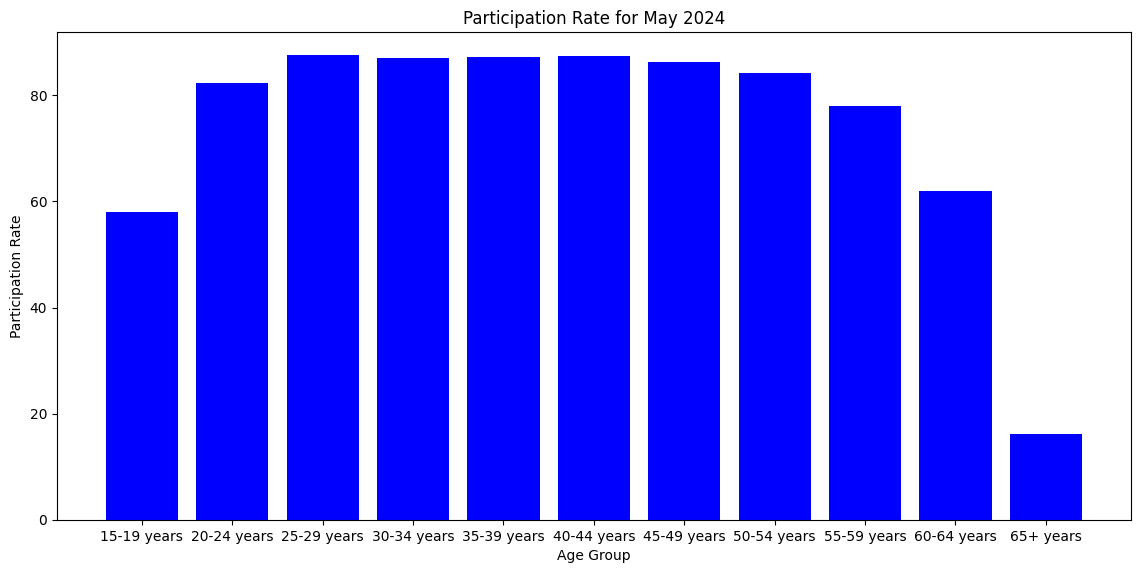

In [721]:
# plot the participation rate for each age group for May 2024

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.tight_layout(pad=3.0)

ax.bar(df["Age Group"], df["Participation Rate"], color="blue")
ax.set_title("Participation Rate for May 2024")
ax.set_xlabel("Age Group")
ax.set_ylabel("Participation Rate")

plt.show()

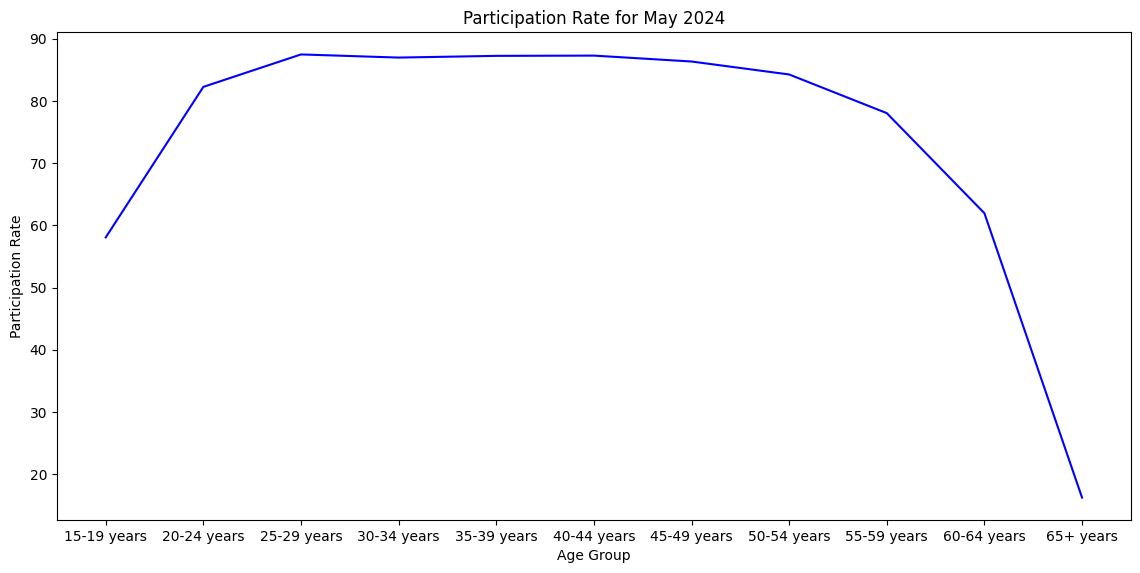

In [722]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.tight_layout(pad=3.0)

ax.plot(df["Age Group"], df["Participation Rate"], color="blue")
ax.set_title("Participation Rate for May 2024")
ax.set_xlabel("Age Group")
ax.set_ylabel("Participation Rate")

plt.show()


In [760]:
data5_df3 = pd.read_excel(data5_file, sheet_name="Data3")

data5_df3.rename(columns={data5_df3.columns[0]: "Date"}, inplace=True)

data5_df3 = data5_df3[["Date", "Participation rate ;  > Males ;", "Participation rate ;  > Females ;"]]
data5_df3.columns = ["Date", "Participation Rate Males", "Participation Rate Females"]

data5_df3.head(12)


,Date,Participation Rate Males,Participation Rate Females
0,Unit,Percent,Percent
1,Series Type,Original,Original
2,Data Type,PERCENT,PERCENT
3,Frequency,Month,Month
4,Collection Month,1,1
5,Series Start,1978-02-01 00:00:00,1978-02-01 00:00:00
6,Series End,2024-06-01 00:00:00,2024-06-01 00:00:00
7,No. Obs,557,557
8,Series ID,A84591162K,A84592674J
9,1978-02-01 00:00:00,80.095269,43.731849


In [761]:

data5_df3 = data5_df3.dropna()
data5_df3 = data5_df3.iloc[9:]
data5_df3 = data5_df3.reset_index(drop=True)
data5_df3["Date"] = pd.to_datetime(data5_df3["Date"])

data5_df3 = data5_df3[(data5_df3["Date"].dt.year == 1980) & (data5_df3["Date"].dt.month == 5) | (data5_df3["Date"].dt.year == 2024) & (data5_df3["Date"].dt.month == 5)]
data5_df3 = data5_df3.reset_index(drop=True)
data5_df3.head(12)

,Date,Participation Rate Males,Participation Rate Females
0,1980-05-01,78.624895,44.736097
1,2024-05-01,71.324498,63.20228


In [762]:

data5_df3["Date"] = data5_df3["Date"].dt.year.astype(str) + "-" + data5_df3["Date"].dt.month.astype(str)
data5_df3.head(12)

,Date,Participation Rate Males,Participation Rate Females
0,1980-5,78.624895,44.736097
1,2024-5,71.324498,63.20228


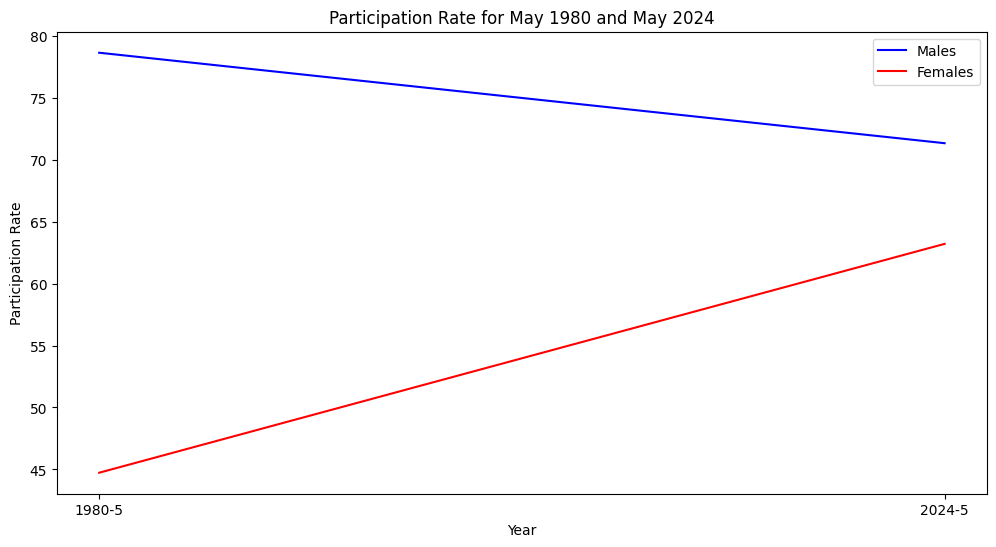

In [763]:
# plot to compare the participation of males and females in the workforce for May 1980 and May 2024

fig = plt.figure(figsize=(12, 6))
plt.plot(data5_df3["Date"], data5_df3["Participation Rate Males"], label="Males", color="blue")
plt.plot(data5_df3["Date"], data5_df3["Participation Rate Females"], label="Females", color="red")
plt.title("Participation Rate for May 1980 and May 2024")
plt.xlabel("Year")
plt.ylabel("Participation Rate")
plt.legend()

plt.show()

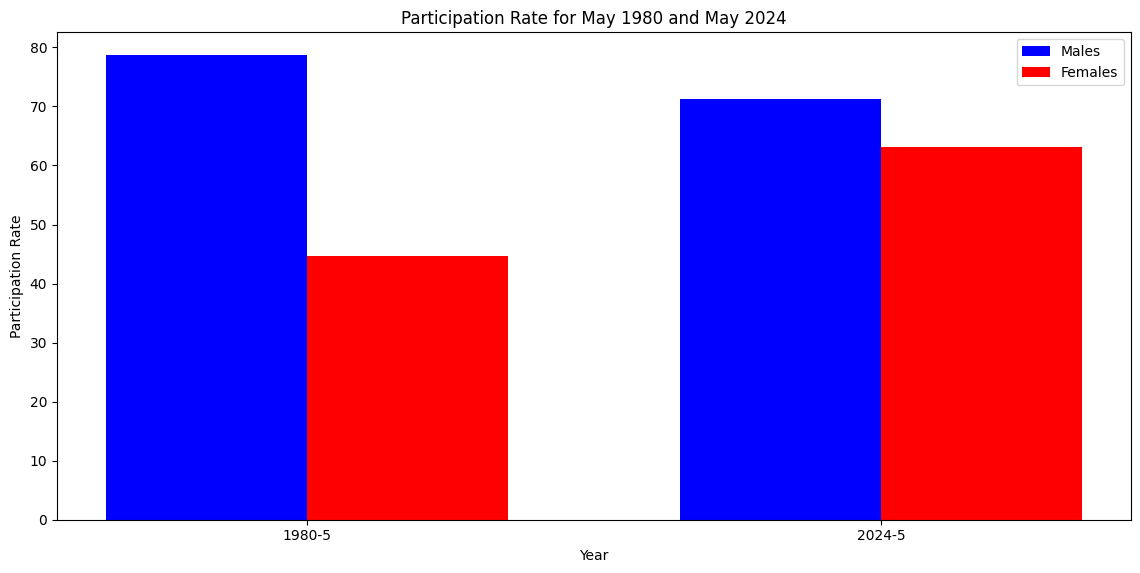

In [764]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.tight_layout(pad=3.0)

barWidth = 0.35

r1 = np.arange(len(data5_df3["Date"]))
r2 = [x + barWidth for x in r1]

ax.bar(r1, data5_df3["Participation Rate Males"], color="blue", width=barWidth, label="Males")
ax.bar(r2, data5_df3["Participation Rate Females"], color="red", width=barWidth, label="Females")

ax.set_title("Participation Rate for May 1980 and May 2024")
ax.set_xlabel("Year")
ax.set_ylabel("Participation Rate")
ax.set_xticks([r + barWidth/2 for r in range(len(data5_df3["Date"]))])
ax.set_xticklabels(data5_df3["Date"])
ax.legend()

plt.show()